In [8]:
import os
import warnings
from tqdm import tqdm
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sankeyflow import Sankey

tqdm.pandas()
warnings.filterwarnings("ignore")
plt.style.use('dark_background')

In [9]:
finances_path = "C:/Users/KARNAV/Downloads/ashoka finance.csv"

In [139]:
df = pd.read_csv(finances_path)
df["year"] = df["quarter"].apply(lambda x: x.split(" ")[1])
df["quarter"] = df["quarter"].apply(lambda x: x.split(" ")[0])
df["category"] = df["category"].replace("Institution", "Institutional").replace("Instituional", "Institutional")
df["amount"] = df["amount"].apply(lambda x: float(x.replace(",", ".")))
df["name"] = df["name"].apply(lambda x: x.replace("\n", "").strip(".").replace("  ", " ").replace("&", "and")).replace("The Trivedi Family Foundation", "Trivedi Family Foundation").replace("Deutsche Bank AG", "Deutsche Bank").replace("Satpal Khatter", "Satpal Khattar").replace("Citi Bank N A", "Citi Bank NA").replace("Citibank NA", "Citi Bank NA").replace("IFRE Inc", "IFRE INC").replace("SEMAC AND PARTNERS LLC OMAN", "Semac and Partners LLC Oman").replace("The University of Witwatersrand", "The University of the Witwatersrand").replace("American Cancer Society Inc", "American Cancer Society").replace("Welcome Trust", "Wellcome Trust")
df["address"] = df.groupby("name")["address"].transform("first")
df["common_name"] = df["name"].replace("Semac and Partners LLC Oman", "SEMAC Oman").replace("The Hongkong and Shanghai Banking Corporation Ltd", "HSBC").replace("Amansa Capital Pte Ltd", "Amansa Capital").replace("National Philanthropic Trust UK Limited", "UK National Philanthropic Trust").replace("Citi Bank NA", "CitiBank").replace("Rajendra Kumar Mishra", "Raj Mishra (Indea Capital)").replace("Ajit Nedungadi", "Ajit Nedungadi (TA Assoc)").replace("Raju Shukla", "Raju Shukla (Cleantech Energy)").replace("Ravi Mahinder Lambah", "Ravi Lambdah (Temasek)").replace("Shah Chetankumar Bhupendra", "Shah Chetankumar (Deutsche)").replace("Shiv Puri", "Shiv Puri (TVF Capital)").replace("Atin Kukreja", "Atin Kukreja (Rippledot)").replace("Samir Chandra Arora", "Samir Arora (Helios Capital)").replace("Dalip Pathak", "Dalip Pathak (Warburg Pincus)")
df

,quarter,serial,name,category,address,type,amount,year,common_name
0,Q1,1,Shiv Puri,Individual,"435 Orchard Road 11F Wisma Atria, Singapore , ...",Educational,66.40,2017-18,Shiv Puri (TVF Capital)
1,Q1,2,Rajendra Kumar Mishra,Individual,"5th Floor Paville House Twin Towers Lane, Off ...",Educational,128.84,2017-18,Raj Mishra (Indea Capital)
2,Q1,3,Amansa Capital Pte Ltd,Institutional,250 North Bridge Road 12-03 Raffles City Tower...,Educational,45.57,2017-18,Amansa Capital
3,Q1,4,Amansa Capital Pte Ltd,Institutional,250 North Bridge Road 12-03 Raffles City Tower...,Educational,45.57,2017-18,Amansa Capital
4,Q2,1,Trivedi Family Foundation,Institutional,"1305 Cherrington Parkway Building 210, Suite 4...",Educational,499.68,2017-18,Trivedi Family Foundation
...,...,...,...,...,...,...,...,...,...
135,Q4,2,Amansa Capital Pte Ltd,Institutional,250 North Bridge Road 12-03 Raffles City Tower...,Educational,200.00,2021-22,Amansa Capital
136,Q4,3,Peace Research Institute Oslo,Institutional,"Hausmanns Gate 3 NO\n 0186 Oslo , Norway,",Educational,4.64,2021-22,Peace Research Institute Oslo
137,Q4,4,Sabine Vaccine Institute,Institutional,"2000\n PENNSYLVANIA AVE SUITE WASHINGTON ,\n U...",Educational,29.36,2021-22,Sabine Vaccine Institute
138,Q4,5,Deutsche Bank,Institutional,"Deutsche Bank House, Hazarimal Somani Marg, Fo...",Educational,504.23,2021-22,Deutsche Bank


In [155]:
quarter_sums = pd.DataFrame(df.groupby(["quarter", "year"])["amount"].sum())
annual_sums = pd.DataFrame(df.groupby("year")["amount"].sum())
donors = pd.DataFrame(df.groupby(["name"]).agg({"amount": "sum", "category": "first", "common_name": "first"}))

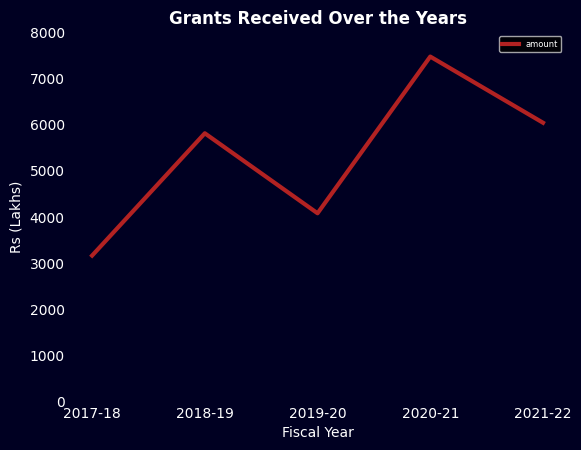

In [156]:
ax = annual_sums.plot(kind='line', linewidth=3, fontsize=10, color="firebrick")
plt.title('Grants Received Over the Years', weight="bold", fontsize=12)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')

ax.set_ylim(0, 8000)
plt.xlabel('Fiscal Year', fontsize=10)
plt.ylabel('Rs (Lakhs)', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.legend(fontsize=6, loc="upper right")
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.show()

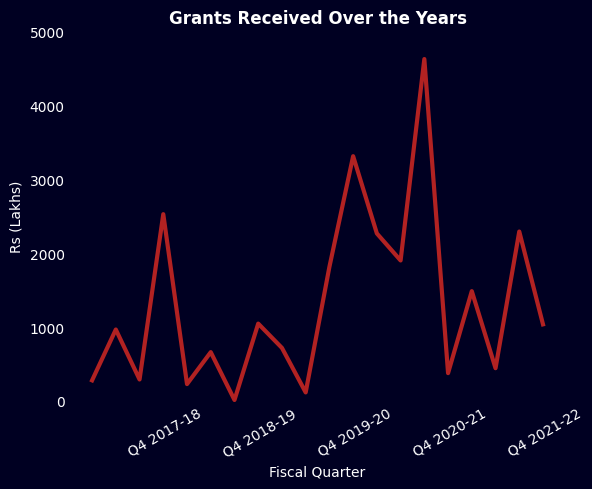

In [157]:
ax = quarter_sums.plot(kind='line', linewidth=3, fontsize=10, color="firebrick", legend=False)
plt.title('Grants Received Over the Years', weight="bold", fontsize=12)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')

ax.set_ylim(0, 5000)
plt.xlabel('Fiscal Quarter', fontsize=10)
plt.ylabel('Rs (Lakhs)', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

import numpy as np
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 4)[1:])
plt.xticks(ticks=np.arange(start, end, 4)[1:], labels=["Q4 " + x for x in list(annual_sums.index)], rotation=30)

plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.show()

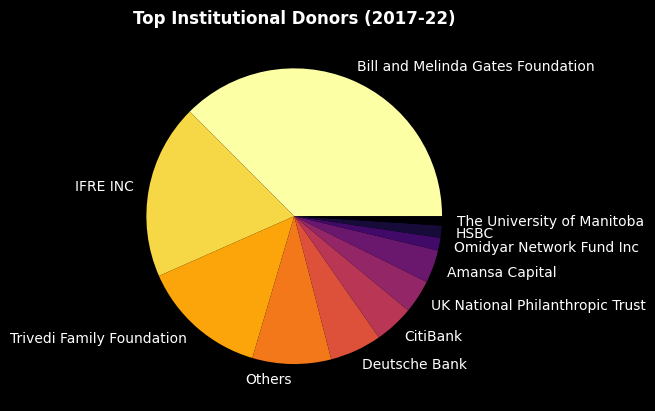

In [147]:
agg_donors = donors[donors["category"] == "Institutional"].sort_values(by=["amount"], ascending=False)
agg_donors.index = agg_donors["common_name"]
agg_donors["agg_name"] = agg_donors["common_name"].apply(lambda x: x if x in agg_donors.iloc[:10]["common_name"] else "Others")
agg_donors = pd.DataFrame(agg_donors.groupby("agg_name")["amount"].sum()).sort_values(by=["amount"], ascending=False)

ax = agg_donors.plot.pie(y="amount", fontsize=10, legend=False, cmap="inferno_r")

plt.title("Top Institutional Donors (2017-22)", weight="bold")
ax.set_axis_off()

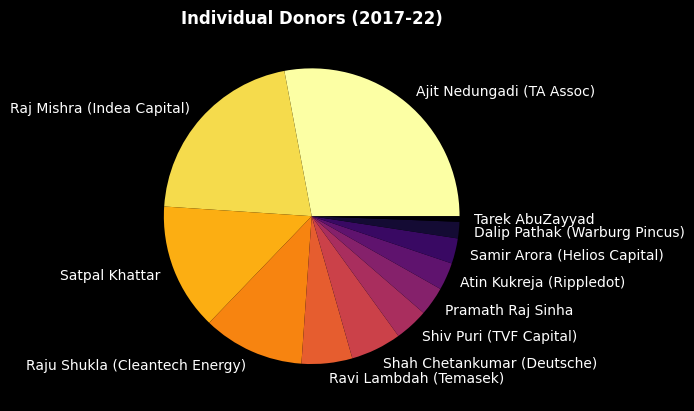

In [146]:
agg_donors = donors[donors["category"] == "Individual"].sort_values(by=["amount"], ascending=False)
agg_donors.index = agg_donors["common_name"]
agg_donors["agg_name"] = agg_donors["common_name"].apply(lambda x: x if x in agg_donors["common_name"] else "Others")
agg_donors = pd.DataFrame(agg_donors.groupby("agg_name")["amount"].sum()).sort_values(by=["amount"], ascending=False)

ax = agg_donors.plot.pie(y="amount", fontsize=10, legend=False, cmap="inferno_r")

plt.title("Individual Donors (2017-22)", weight="bold")
ax.set_axis_off()

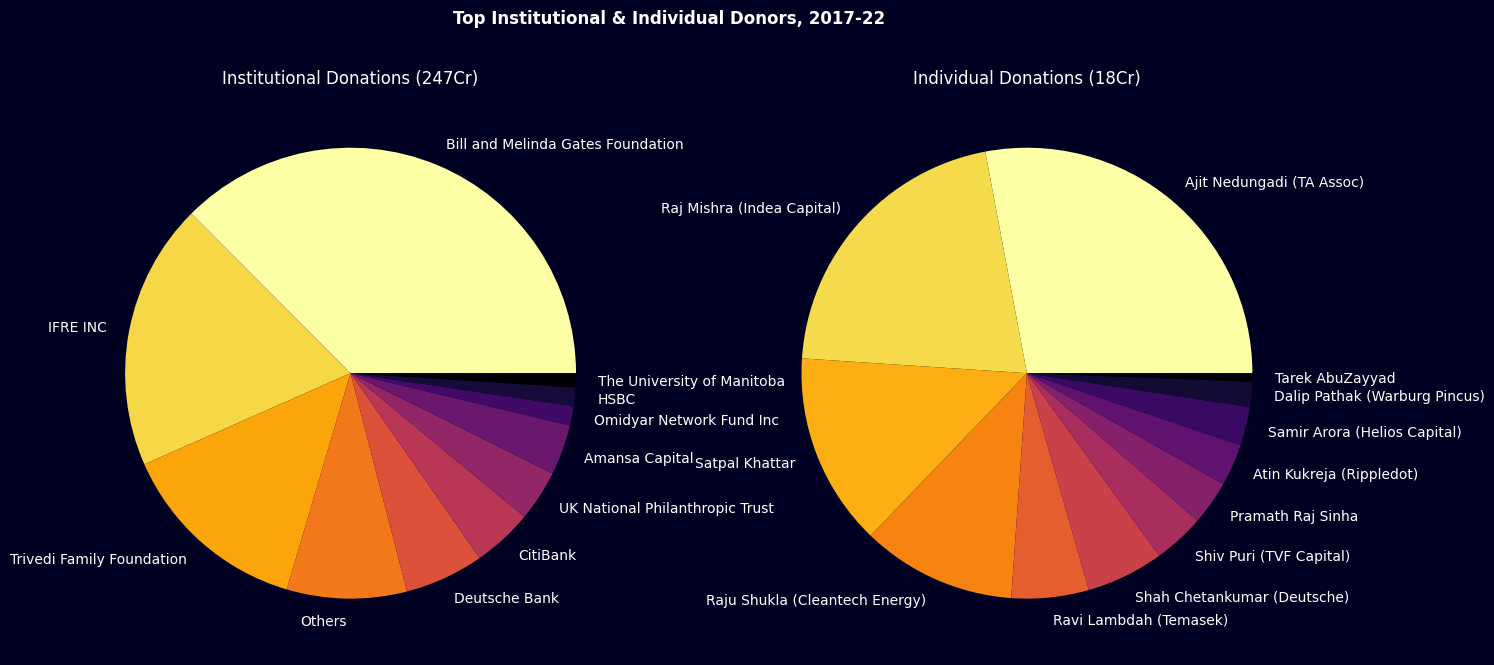

In [158]:
agg_donors1 = donors[donors["category"] == "Institutional"].sort_values(by=["amount"], ascending=False)
agg_donors1.index = agg_donors1["common_name"]
agg_donors1["agg_name"] = agg_donors1["common_name"].apply(lambda x: x if x in agg_donors1.iloc[:10]["common_name"] else "Others")
agg_donors1 = pd.DataFrame(agg_donors1.groupby("agg_name")["amount"].sum()).sort_values(by=["amount"], ascending=False)

agg_donors2 = donors[donors["category"] == "Individual"].sort_values(by=["amount"], ascending=False)
agg_donors2.index = agg_donors2["common_name"]
agg_donors2["agg_name"] = agg_donors2["common_name"].apply(lambda x: x if x in agg_donors2["common_name"] else "Others")
agg_donors2 = pd.DataFrame(agg_donors2.groupby("agg_name")["amount"].sum()).sort_values(by=["amount"], ascending=False)

fig, axes = plt.subplots(ncols=2, figsize=(16, 8), facecolor="#000022")
fig.suptitle("Top Institutional & Individual Donors, 2017-22", weight="bold", x=0.5, y=0.95)

agg_donors1.plot.pie(ax=axes[0], y="amount", fontsize=10, legend=False, cmap="inferno_r")
axes[0].set_title("Institutional Donations (247Cr)")
axes[0].set_axis_off()

agg_donors2.plot.pie(ax=axes[1], y="amount", fontsize=10, legend=False, cmap="inferno_r")
axes[1].set_title("Individual Donations (18Cr)")
axes[1].set_axis_off()

In [143]:
donors.groupby("category")["amount"].sum()

category
Individual        1804.48
Institutional    24742.31
Name: amount, dtype: float64

In [13]:
def plot_histogram(x1, bins, title, x_label, y_label, color1, lcolor1, x2=None, color2=None, lcolor2=None):

    if x2 is not None:
        ax = x1.hist(bins=bins, xlabelsize=10, ylabelsize=6, color=color1, density=True, alpha=0.8)
        plt.axvline(x1.median(), color=lcolor1, linestyle='dashed', linewidth=2)
        ax2 = x2.hist(bins=bins, xlabelsize=10, ylabelsize=6, color=color2, density=True, alpha=0.6)
        plt.axvline(x2.median(), color=lcolor2, linestyle='dashed', linewidth=2)
    else:
        ax = x1.hist(bins=bins, xlabelsize=10, ylabelsize=6, color=color1)
        plt.axvline(x1.median(), color=lcolor1, linestyle='dashed', linewidth=2)

    ax.set_title(title, weight='bold')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    plt.grid(False)
    plt.show()

In [ ]:
plot_histogram(df[(df["cgpa"] != 0) & (df["grad"] <= 2024) & (df["program"] == "ASP")]["cgpa"], 39, "Distribution of CGPAs (UGs and ASPs)", "CGPA", "Frequency", "firebrick", "red", df[(df["cgpa"] != 0) & (df["grad"] <= 2024) & (df["program"] == "UG")]["cgpa"], "steelblue", "aqua")

In [ ]:
print(f'Mean: {statistics.mean(df[(df["cgpa"] != 0) & (df["batch"] == "UG 2021-24")]["cgpa"]):.2f}')
print(f'Median: {statistics.median(df[(df["cgpa"] != 0) & (df["batch"] == "UG 2021-24")]["cgpa"]):.2f}')
print(f'Mode: {statistics.mode(df[(df["cgpa"] != 0) & (df["batch"] == "UG 2021-24")]["cgpa"]):.2f}')
print(f'Std Dev: {statistics.stdev(df[(df["cgpa"] != 0) & (df["batch"] == "UG 2021-24")]["cgpa"]):.2f}')
print(f'Variance: {statistics.variance(df[(df["cgpa"] != 0) & (df["batch"] == "UG 2021-24")]["cgpa"]):.2f}')

plot_histogram(df[(df["cgpa"] != 0) & (df["batch"] == "UG 2021-24")]["cgpa"], 39, "Distribution of CGPAs (UG24)", "CGPA", "Frequency", "steelblue", "aqua")

In [ ]:
plot_histogram(df[(df["cgpa"] != 0) & (df["batch"] == "UG 2021-24")]["cgpa"], 39, "Distribution of CGPAs (UG24 and ASP24)", "CGPA", "Frequency", "steelblue", "aqua", df[(df["cgpa"] != 0) & (df["batch"] == "ASP 2023-24")]["cgpa"], "firebrick", "red")

In [ ]:
plot_histogram(df[(df["cgpa"] != 0) & (df["batch"] == "UG 2014-17")]["cgpa"], 39, "Distribution of CGPAs (first and latest batch)", "CGPA", "Frequency", "firebrick", "red", df[(df["cgpa"] != 0) & (df["batch"] == "UG 2021-24")]["cgpa"], "steelblue", "aqua")

In [ ]:
ugs = df[(df["program"] == "UG") & (df["cgpa"] != 0)].dropna(subset=["major"]).reset_index(drop=True)
asps = df[(df["program"] == "ASP") & (df["cgpa"] != 0)]

In [ ]:
def plot_gpas(df, cat, lims):
    categories = df[cat].unique()
    categories.sort()
    colors = plt.cm.get_cmap('Spectral', len(categories))
    color_map = {category: colors(i) for i, category in enumerate(categories)}
    df["colour"] = df[cat].map(color_map)

    df.plot.scatter(x="cgpa", y="mgpa", c=df["colour"], alpha=0.8)

    for category in categories:
        plt.scatter([], [], color=color_map[category], label=category)
    plt.legend(title='Major', fontsize=6)

    plt.title('CGPA and MGPA by Major', weight="bold")
    plt.xlabel('CGPA')
    plt.ylabel('MGPA')
    plt.xlim(lims[0], lims[1])
    plt.ylim(lims[0], lims[1])
    plt.grid(False)
    plt.show()

In [ ]:
plot_gpas(ugs[ugs["grad"] <= 2025], "major", (2.0, 4.0))

In [ ]:
plot_gpas(ugs[(ugs["grad"] <= 2025) & (ugs["major"].isin(["ECOFIN", "ECO", "PSY", "POL", "CS"]))], "major", (2.0, 4.0))

In [ ]:
plot_gpas(ugs[(ugs["grad"] <= 2025) & (ugs["major"].isin(["ECOFIN", "ECO", "PSY", "POL", "CS"]))], "major", (1.0, 4.0))

In [ ]:
plot_gpas(ugs[(ugs["grad"] <= 2025) & (ugs["major"].isin(["ECOFIN", "ECO"]))], "major", (1.0, 4.0))

In [ ]:
latins = df[(df["program"] == "UG") & (df["grad"] <= 2024) & (df["cgpa"] > 3.75)]
students = df[(df["program"] == "UG") & (df["grad"] <= 2024) & (df["major"].isin(latins["major"].unique()))]

ax = students["major"].hist(bins=students["major"].nunique(), color="steelblue", density=True, alpha=0.8)
ax2 = latins["major"].hist(bins=latins["major"].nunique(), color="firebrick", density=True, alpha=0.7)
ax.set_title('Share of students vs 3.75+ students by major', weight='bold')
ax.set_xlabel('Major')
ax.set_ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
latins = df[(df["program"] == "UG") & (df["grad"] <= 2024) & (df["cgpa"] < 3.0)]
students = df[(df["program"] == "UG") & (df["grad"] <= 2024) & (df["major"].isin(latins["major"].unique()))]

ax = students["major"].hist(bins=students["major"].nunique(), color="steelblue", density=True, alpha=0.8)
ax2 = latins["major"].hist(bins=latins["major"].nunique(), color="firebrick", density=True, alpha=0.7)
ax.set_title('Share of students vs 3.0- students by major', weight='bold')
ax.set_xlabel('Major')
ax.set_ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
def construct_means_over_time(df, is_major=False, start_year=2017):
    cmeans_yearly, cmedians_yearly = [], []
    for year in range(start_year, 2025):
        cmeans_yearly.append((year, statistics.mean(df[df["grad"] == year]["cgpa"])))
        cmedians_yearly.append((year, statistics.median(df[df["grad"] == year]["cgpa"])))

    years = pd.DataFrame(cmeans_yearly, columns=["year", "meanc"])
    years["medianc"] = [x[1] for x in cmedians_yearly]

    if is_major:
        mmeans_yearly, mmedians_yearly = [], []
        for year in range(2017, 2025):
            mmeans_yearly.append((year, statistics.mean(df[df["grad"] == year]["mgpa"])))
            mmedians_yearly.append((year, statistics.median(df[df["grad"] == year]["mgpa"])))

        years["meanm"] = [x[1] for x in mmeans_yearly]
        years["medianm"] = [x[1] for x in mmedians_yearly]

    return years

In [ ]:
def plot_means_over_time(df, title, is_major=False):
    ax = df["meanc"].plot(kind='line', linestyle="dotted", marker='o', x="year", y="cgpa", color="steelblue")
    ax2 = df["medianc"].plot(kind='line', linestyle="solid", marker='o', x="year", y="cgpa", color="steelblue")
    if is_major:
        ax3 = df["meanm"].plot(kind='line', linestyle="dotted", marker='o', x="year", y="cgpa", color="firebrick")
        ax4 = df["medianm"].plot(kind='line', linestyle="solid", marker='o', x="year", y="cgpa", color="firebrick")
    plt.title(title, weight="bold")
    plt.xlabel('Year')
    plt.ylabel("CGPA")
    ax.set_xticklabels([2017] + list(df["year"]))
    plt.grid(False)
    plt.show()

In [ ]:
def plot_major_gpa_over_time(df, value, title, sizes=False):

    # Create df of count and median GPA by year and major
    majors = ["ECOFIN", "ECO", "PSY", "POL", "CS", "ENG", "SOA"]
    majors_df = construct_means_over_time(df[df["major"] == "ECOFIN"], is_major=True)
    majors_df["major"] = "ECOFIN"

    for major in majors[1:]:
        major_df = construct_means_over_time(df[df["major"] == major], is_major=True)
        major_df["major"] = major
        majors_df = pd.concat([majors_df, major_df])
    majors_df.reset_index(drop=True, inplace=True)

    colours = plt.cm.get_cmap('Spectral', len(majors))
    colour_map = {category: colours(i) for i, category in enumerate(majors)}
    majors_df["colour"] = majors_df["major"].map(colour_map)

    for major in majors:
        for year in majors_df["year"].unique():
            majors_df.loc[(majors_df["major"] == major) & (majors_df["year"] == year), "count"] = df[(df["major"] == major) & (df["grad"] == year)]["email"].nunique()

    for major in majors:
        subset = majors_df[majors_df["major"] == major]
        if sizes:
            plt.scatter(x=subset["year"], y=subset[value], color=colour_map[major], s=subset["count"])
        else:
            plt.plot(subset["year"], subset[value], label=major, color=colour_map[major], marker='.')

    plt.legend(title='Major', fontsize=6)
    plt.title(title, weight="bold")
    plt.xlabel('Year')
    plt.ylabel("CGPA")
    ax.set_xticklabels([2017] + list(majors_df["year"]))
    plt.grid(False)
    plt.show()

In [ ]:
plot_means_over_time(construct_means_over_time(ugs, is_major=True), "Median & Mean CGPA and MGPA Over the Years (UGs)", is_major=True)

In [ ]:
plot_means_over_time(construct_means_over_time(asps, start_year=2018), "Median & Mean CGPA Over the Years (ASPs)")

In [ ]:
plot_major_gpa_over_time(ugs, "medianc", "Median CGPA Over the Years by Major", sizes=False)

In [ ]:
plot_major_gpa_over_time(ugs, "medianm", "Median MGPA Over the Years by Major", sizes=False)

In [ ]:
plot_major_gpa_over_time(ugs, "medianc", "Median CGPA Over the Years by Major", sizes=True)

In [ ]:
plot_major_gpa_over_time(ugs, "medianm", "Median MGPA Over the Years by Major", sizes=True)